In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

ignaciovinuales_battery_remaining_useful_life_rul_path = kagglehub.dataset_download('ignaciovinuales/battery-remaining-useful-life-rul')
geethapitta17_battery_rul_path = kagglehub.dataset_download('geethapitta17/battery-rul')

print('Data source import complete.')


100%|██████████| 374k/374k [00:00<00:00, 34.0MB/s]

Extracting files...


100%|██████████| 374k/374k [00:00<00:00, 46.9MB/s]

Extracting files...
Data source import complete.


# Imports

In [ ]:
import pandas as pd

import numpy as np

import os, glob

import matplotlib.pyplot as plt

import seaborn



from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

from sklearn.datasets import load_iris



import tensorflow as tf
devs = tf.config.list_physical_devices('GPU')
for dev in devs:
    tf.config.experimental.set_memory_growth(dev, True)
    print(dev)

from tensorflow.keras import Sequential, optimizers, losses, layers



%matplotlib inline












# Data Pre-processing

In [ ]:
df_overview = pd.read_csv('/Battery_RUL.csv')
df_overview.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [ ]:
def plot_dataframe_subplots(df, nrows, ncols, figsize=(30, 24)):
    """Plot a nrows x ncols grid of the df variables against the first column."""

    measurements = list(df.columns)
    plt.figure(figsize=figsize)

    # Use measurements[0] as the x-axis for all other variables
    x_values = df[measurements[0]]  # X-axis variable

    for idx, key in enumerate(measurements[1:], 1):  # Start from second measurement
        plt.subplot(nrows, ncols, idx)
        plt.plot(x_values, df[key])  # Plot other variables against measurements[0]
        plt.ylabel(key)
        plt.grid(True)
        plt.xlabel(measurements[0])  # X-axis is always measurements[0]

    plt.tight_layout()
    plt.show()


In [ ]:
df_master = df_overview

print(list(df_master.columns.values))

['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']


In [ ]:
df_master.head()


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [ ]:
import pandas as pd

# get columns with NaN values

cols_with_nan = df_master.columns[df_master.isna().any()].tolist()



# print out columns with NaN values and how many NaN values they have

for col in cols_with_nan:

    print(col, "has", df_master[col].isna().sum(), "NaN values")

In [ ]:

dftest = df_master

In [ ]:

print(list(dftest.columns.values))

['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']


In [ ]:


import pandas as pd

# get columns with NaN values

cols_with_nan = dftest.columns[dftest.isna().any()].tolist()



# print out columns with NaN values and how many NaN values they have

for col in cols_with_nan:

    print(col, "has", dftest[col].isna().sum(), "NaN values")

In [ ]:
dftest=dftest.dropna()

In [ ]:
import pandas as pd

# get columns with NaN values

cols_with_nan = dftest.columns[dftest.isna().any()].tolist()



# print out columns with NaN values and how many NaN values they have

for col in cols_with_nan:

    print(col, "has", dftest[col].isna().sum(), "NaN values")

In [ ]:
print(list(dftest.columns.values))

['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']


In [ ]:


def set_negative_plot_color():

    plt.figure(figsize=(30, 6), facecolor='black')

    ax = plt.axes()

    ax.set_facecolor("black")

    ax.spines['bottom'].set_color('white')

    ax.spines['top'].set_color('white')

    ax.spines['right'].set_color('white')

    ax.spines['left'].set_color('white')

    ax.tick_params(colors='white', which='both')

    plt.grid(True)



def regression_metrics(y_test, y_pred):

    # calculate errors

    mse = mean_squared_error(y_test, y_pred)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    eps = 1e-10 # a small value to avoid division by zero

    rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / (y_test + eps))))

    #rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred)/y_test)), axis=0))

    mae = mean_absolute_error(y_test, y_pred)

    mape = mean_absolute_percentage_error(y_test, y_pred)

    # report error

    print(f'Mean Squared Error: {mse}')

    print(f'Root Mean Square Error: {rmse}')

    print(f'Root Mean Square Percentage Error: {rmspe}')

    print(f'Mean Absolute Error: {mae}')

    print(f'Mean Absolute Percentage Error: {mape}')





def plot_comparison(y_test, y_pred, xlabel, ylabel, dark_mode=False, figsize=(30, 6)):

    import matplotlib as mpl

    mpl.rcParams['agg.path.chunksize'] = 200

    mpl.rcParams['path.simplify_threshold'] = 0.5

    if dark_mode:

        plt.figure(figsize=figsize, facecolor='black')

        ax = plt.axes()

        ax.set_facecolor("black")

        ax.spines['bottom'].set_color('gray')

        ax.spines['top'].set_color('gray')

        ax.spines['right'].set_color('gray')

        ax.spines['left'].set_color('gray')

        ax.tick_params(colors='white', which='both')

        plt.plot(y_pred, color="yellow")

        plt.plot(y_test, color="white")

        plt.legend(['Predicted', 'Measured'])

        plt.xlabel(xlabel, color='white')

        plt.ylabel(ylabel, color='white')

    else:

        plt.figure(figsize=figsize)

        plt.plot(y_pred)

        plt.plot(y_test)

        plt.legend(['Predicted', 'Measured'])

        plt.xlabel(xlabel)

        plt.ylabel(ylabel)

    plt.grid(True)


In [ ]:
X=dftest.drop(['RUL'],axis=1)

y= dftest['RUL']

In [ ]:

df_x_y = dftest

In [ ]:
print(list(df_x_y.columns.values))

['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']


In [ ]:
# from sklearn.model_selection import train_test_split

X = df_x_y.drop(['RUL'], axis=1)

y = df_x_y[['RUL']]  # Close the square bracket

# Split the data into train and test sets with a ratio of 95:5

splitter = int(len(X) * 0.95)

X_train, X_test = X.values[:splitter], X.values[splitter:]

y_train, y_test = y.values[:splitter], y.values[splitter:]



# Split the train set into train and validation sets with a ratio of 90:10

splitter1 = int(len(X_train) * 0.9)

X_train, X_val = X_train[:splitter1], X_train[splitter1:]

y_train, y_val = y_train[:splitter1], y_train[splitter1:]



# Check the dataset sizes

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)


(12879, 8) (12879, 1) (1431, 8) (1431, 1) (754, 8) (754, 1)


# new today


# Model 1 with Relu

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_28 (Conv1D)  │ (None, 8, 32)     │        128 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_29 (Conv1D)  │ (None, 8, 32)     │        128 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_30 (Conv1D)  │ (None, 8, 32)     │        128 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_21       │ (None, 8, 32)     │          0 │ conv1d_28[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_22       │ (None, 8, 32)     │          0 │ conv1d_29[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_23       │ (None, 8, 32)     │          0 │ conv1d_30[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 8, 32)     │          0 │ activation_21[0]… │
│                     │                   │            │ activation_22[0]… │
│                     │                   │            │ activation_23[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_12 (GRU)        │ (None, 32)        │      6,336 │ add_9[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 16)        │        528 │ gru_12[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 8)         │        136 │ dense_31[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 1)         │          9 │ dense_32[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,393 (28.88 KB)

 Trainable params: 7,393 (28.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 261.0479 - mae: 260.9631 - val_loss: 62.7115 - val_mae: 62.5751 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 69.9069 - mae: 69.7547 - val_loss: 26.4059 - val_mae: 26.2354 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 31.4324 - mae: 31.2544 - val_loss: 34.3827 - val_mae: 34.1869 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 29.0144 - mae: 28.8064 - val_loss: 24.3275 - val_mae: 24.0869 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 29.2204 - mae: 28.9736 - val_loss: 36.7554 - val_mae: 36.5006 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 37.0204 - mae: 36.7593 - val_loss: 34.0154 - val_mae: 33.7375 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 35.4232 - mae: 35.1374 - val_loss: 23.6070 - val_mae: 2

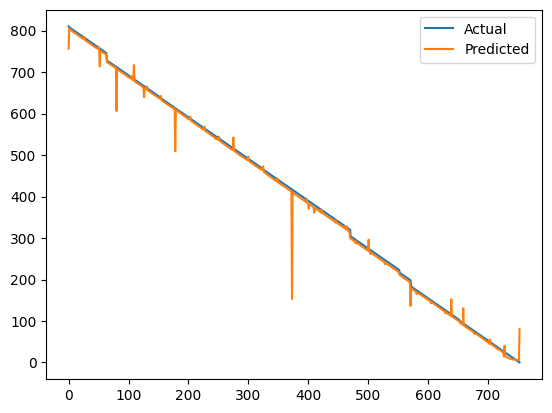

In [ ]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...


# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Define a TCN block with dilations

def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):

    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)

    conv1 = Activation('relu')(conv1)

    return conv1



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# TCN block

tcn_blocks = []

for dilation_rate in [1, 2, 4]:

    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)

    tcn_blocks.append(tcn_block)



# Merge TCN blocks

merged = Add()(tcn_blocks)



# GRU layer with regularization and dropout

gru_layer = GRU(32, activation='relu', return_sequences=False,

                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(merged)



# Dense layers

dense1 = Dense(16, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)

dense2 = Dense(8, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model1 = Model(inputs=input_layer, outputs=output_layer)



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model1.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)
lronplat = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5)

combined_model1.summary()

 # Train the model

history = combined_model1.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model1.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()

# Model 1 with own function1

In [ ]:
def custom_activation(x):
    return tf.where(x >= 0, tf.tanh(x), tf.atan(x))

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_31 (Conv1D)  │ (None, 8, 32)     │        128 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_32 (Conv1D)  │ (None, 8, 32)     │        128 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_33 (Conv1D)  │ (None, 8, 32)     │        128 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_24       │ (None, 8, 32)     │          0 │ conv1d_31[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_25       │ (None, 8, 32)     │          0 │ conv1d_32[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_26       │ (None, 8, 32)     │          0 │ conv1d_33[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 8, 32)     │          0 │ activation_24[0]… │
│                     │                   │            │ activation_25[0]… │
│                     │                   │            │ activation_26[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_13 (GRU)        │ (None, 32)        │      6,336 │ add_10[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 16)        │        528 │ gru_13[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 8)         │        136 │ dense_34[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 1)         │          9 │ dense_35[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,393 (28.88 KB)

 Trainable params: 7,393 (28.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 545.8061 - mae: 545.6936 - val_loss: 594.2243 - val_mae: 594.0844 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 524.9798 - mae: 524.8015 - val_loss: 575.2229 - val_mae: 574.9069 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 504.1271 - mae: 503.7544 - val_loss: 558.0372 - val_mae: 557.4789 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 489.4330 - mae: 488.8040 - val_loss: 542.0185 - val_mae: 541.1667 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 472.0627 - mae: 471.1284 - val_loss: 526.9753 - val_mae: 525.7820 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 457.7137 - mae: 456.4255 - val_loss: 512.8511 - val_mae: 511.2711 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 439.7486 - mae: 438.0428 - val_l

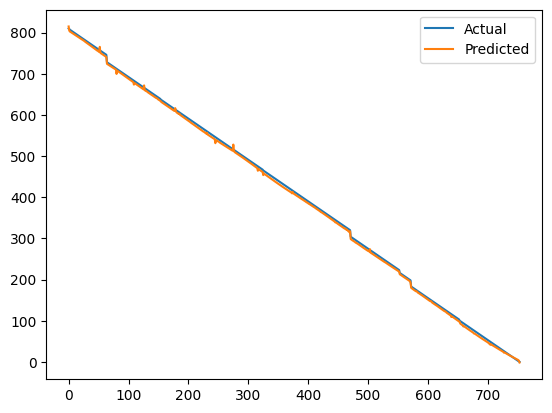

In [ ]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Define a TCN block with dilations

def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):

    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)

    conv1 = Activation(custom_activation)(conv1)

    return conv1



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# TCN block

tcn_blocks = []

for dilation_rate in [1, 2, 4]:

    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)

    tcn_blocks.append(tcn_block)



# Merge TCN blocks

merged = Add()(tcn_blocks)



# GRU layer with regularization and dropout

gru_layer = GRU(32, activation=custom_activation, return_sequences=False,

                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(merged)



# Dense layers

dense1 = Dense(16, activation=custom_activation, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)

dense2 = Dense(8, activation=custom_activation, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model2 = Model(inputs=input_layer, outputs=output_layer)

# combined_model.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model2.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=25)

combined_model2.summary()
# Train the model

history = combined_model2.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model2.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# model 1 with own function 2

In [ ]:
def custom_act(x):
    return tf.where(x>=0, x, tf.tanh(x)+tf.atan(x))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8, 1)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 8, 32)          │            128 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 8, 32)          │              0 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 8, 32)          │              0 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 8, 32)          │              0 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 8, 32)          │              0 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 8, 32)          │              0 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 8, 32)          │              0 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 8, 32)          │              0 │ dropout[0][0],         │
│                           │                        │                │ dropout_1[0][0],       │
│                           │                        │                │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 32)             │          6,336 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 16)             │            528 │ gru[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 8)              │            136 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │              9 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,393 (28.88 KB)

 Trainable params: 7,393 (28.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 208.6068 - mae: 208.4120 - val_loss: 26.2722 - val_mae: 25.9949 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 24.9489 - mae: 24.6523 - val_loss: 39.7817 - val_mae: 39.4349 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 24.9790 - mae: 24.6165 - val_loss: 33.7510 - val_mae: 33.3626 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 21.0808 - mae: 20.6729 - val_loss: 24.9101 - val_mae: 24.4522 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 21.5315 - mae: 21.0707 - val_loss: 23.2624 - val_mae: 22.7871 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 24.4318 - mae: 23.9513 - val_loss: 7.1538 - val_mae: 6.6338 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 16.2838 - mae: 15.7555 - val_loss: 38.1465 - val_m

<ipython-input-24-598ed3c5410d>:90: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Mean Squared Error: 83.98935330305139
Root Mean Square Error: 9.164570546569621
Mean Absolute Error: 2.647822058801626
Mean Absolute Percentage Error: inf
R2 Score: 0.9984625577926636


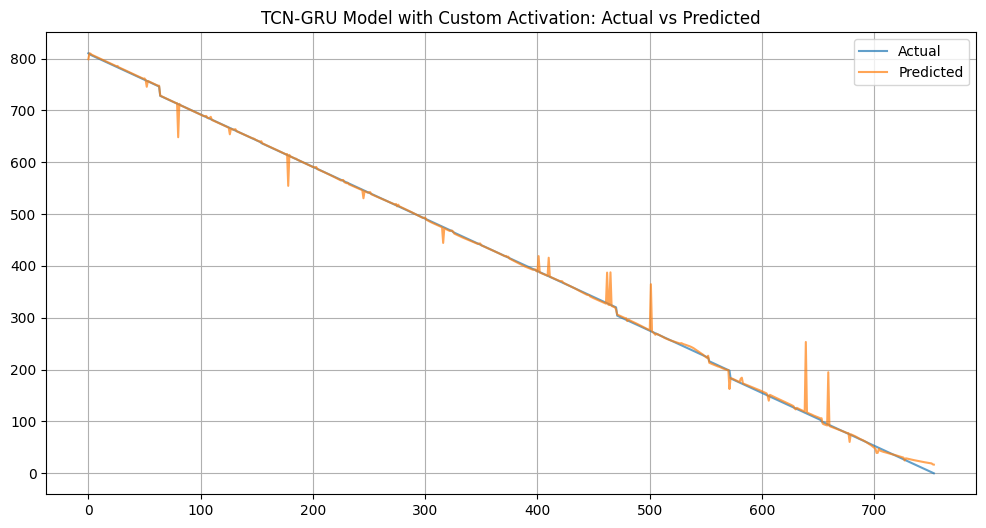

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Activation, Add, GRU, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Placeholder: Load your data (ensure X_train, X_val, X_test, y_train, y_val, y_test are defined)
# For example:
# X_train, X_val, X_test = <your_data_splits>
# y_train, y_val, y_test = <your_labels>

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

# Define your custom activation function
def custom_act(x):
    return tf.where(x >= 0, x, tf.tanh(x) + tf.atan(x))

# Define a TCN block with dilations
def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate, dropout_rate=0.2):
    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)
    conv1 = Activation(custom_act)(conv1)  # Use custom activation here
    conv1 = Dropout(dropout_rate)(conv1)
    return conv1

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))
l2_strength = 0.001

# TCN blocks
tcn_blocks = []
for dilation_rate in [1, 2, 4]:  # Add more dilation rates if needed
    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)
    tcn_blocks.append(tcn_block)

# Merge TCN blocks
merged = Add()(tcn_blocks)

# GRU layer with custom activation and dropout
gru_layer = GRU(32, activation=custom_act, return_sequences=False,
                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(merged)

# Dense layers
dense1 = Dense(16, activation=custom_act, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)
dense2 = Dense(8, activation=custom_act, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model1 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with early stopping
opt = Adam(learning_rate=0.01)
combined_model1.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lronplat = ReduceLROnPlateau(monitor='val_loss', patience=5)

# Model summary
combined_model1.summary()

# Train the model
history = combined_model1.fit(
    X_train_norm, y_train,
    epochs=100,
    verbose=1,
    batch_size=64,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stopping, lronplat]
)

# Evaluate the model on the test set
y_pred_combined = combined_model1.predict(X_test_norm)

# Define regression metrics
def regression_metrics(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Square Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Absolute Percentage Error: {mape}")
    print(f"R2 Score: {r2}")

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', alpha=0.7)
plt.plot(y_pred_combined, label='Predicted', alpha=0.7)
plt.title('TCN-GRU Model with Custom Activation: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


# Model 1 with elu

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 8, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_6 (Activation) │ (None, 8, 32)          │              0 │ conv1d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_7 (Activation) │ (None, 8, 32)          │              0 │ conv1d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_8 (Activation) │ (None, 8, 32)          │              0 │ conv1d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 8, 32)          │              0 │ activation_6[0][0],    │
│                           │                        │                │ activation_7[0][0],    │
│                           │                        │                │ activation_8[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_1 (GRU)               │ (None, 32)             │          6,336 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_9 (Activation) │ (None, 32)             │              0 │ gru_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 16)             │            528 │ activation_9[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_10             │ (None, 16)             │              0 │ dense_3[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 8)              │            136 │ activation_10[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_11             │ (None, 8)              │              0 │ dense_4[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │              9 │ activation_11[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,393 (28.88 KB)

 Trainable params: 7,393 (28.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 344.1884 - mae: 343.9025 - val_loss: 39.9286 - val_mae: 39.3361 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 23.5843 - mae: 22.9700 - val_loss: 24.3535 - val_mae: 23.6933 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 15.9397 - mae: 15.2674 - val_loss: 17.7355 - val_mae: 17.0281 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 12.9945 - mae: 12.2798 - val_loss: 15.7137 - val_mae: 14.9860 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 12.7074 - mae: 11.9738 - val_loss: 13.3463 - val_mae: 12.5907 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 10.3615 - mae: 9.6025 - val_loss: 13.9512 - val_mae: 13.1851 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.9513 - mae: 10.1833 - val_loss: 11.6248 - val_mae

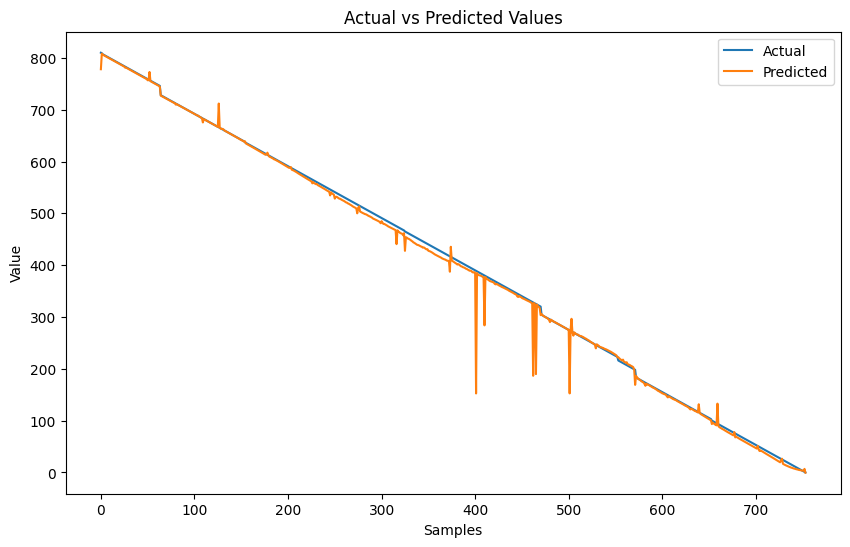

In [ ]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Dropout, Dense, GRU
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate and display regression metrics
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")

# Assume `X_train`, `X_val`, `X_test`, `y_train`, `y_val`, `y_test` are preloaded

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training, validation, and test data
X_train_norm = scaler.fit_transform(X_train).reshape(-1, X_train.shape[1], 1)
X_val_norm = scaler.transform(X_val).reshape(-1, X_val.shape[1], 1)
X_test_norm = scaler.transform(X_test).reshape(-1, X_test.shape[1], 1)

# Define a TCN block with dilations
def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):
    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)
    conv1 = Activation("elu")(conv1)  # Apply ELU activation
    return conv1

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))
l2_strength = 0.001

# TCN blocks with different dilation rates
tcn_blocks = []
for dilation_rate in [1, 2, 4]:
    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)
    tcn_blocks.append(tcn_block)

# Merge TCN blocks
merged = Add()(tcn_blocks)

# GRU layer with ELU activation, regularization, and dropout
gru_layer = GRU(32, return_sequences=False,
                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(merged)
gru_layer = Activation("elu")(gru_layer)  # Apply ELU activation

# Dense layers with ELU activation
dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)
dense1 = Activation("elu")(dense1)  # Apply ELU activation

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Activation("elu")(dense2)  # Apply ELU activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model1 = Model(inputs=input_layer, outputs=output_layer)
combined_model1.summary()

# Compile the model with early stopping and learning rate reduction
opt = Adam(learning_rate=0.01)
combined_model1.compile(optimizer=opt, loss='mae', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lronplat = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

# Train the model
history = combined_model1.fit(X_train_norm, y_train, epochs=100, verbose=1,
                              batch_size=64,
                              validation_data=(X_val_norm, y_val),
                              callbacks=[early_stopping, lronplat])

# Evaluate the model on the test set
y_pred_combined = combined_model1.predict(X_test_norm)

# Display regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Values")
plt.xlabel("Samples")
plt.ylabel("Value")
plt.show()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 8, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_6 (Activation) │ (None, 8, 32)          │              0 │ conv1d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_7 (Activation) │ (None, 8, 32)          │              0 │ conv1d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_8 (Activation) │ (None, 8, 32)          │              0 │ conv1d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 8, 32)          │              0 │ activation_6[0][0],    │
│                           │                        │                │ activation_7[0][0],    │
│                           │                        │                │ activation_8[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_10 (GRU)              │ (None, 32)             │          6,336 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_9 (Activation) │ (None, 32)             │              0 │ gru_10[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 16)             │            528 │ activation_9[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_10             │ (None, 16)             │              0 │ dense_12[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 8)              │            136 │ activation_10[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_11             │ (None, 8)              │              0 │ dense_13[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1)              │              9 │ activation_11[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,393 (28.88 KB)

 Trainable params: 7,393 (28.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 395.7471 - mae: 395.4630 - val_loss: 37.9736 - val_mae: 37.2182 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 37.0371 - mae: 36.2297 - val_loss: 31.7382 - val_mae: 30.8200 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 18.8231 - mae: 17.8904 - val_loss: 33.2393 - val_mae: 32.2817 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 16.3909 - mae: 15.4267 - val_loss: 31.1114 - val_mae: 30.1346 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 15.1432 - mae: 14.1647 - val_loss: 20.3319 - val_mae: 19.3472 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 14.1567 - mae: 13.1647 - val_loss: 14.5292 - val_mae: 13.5225 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 13.1146 - mae: 12.0996 - val_loss: 13.5247 - val_ma

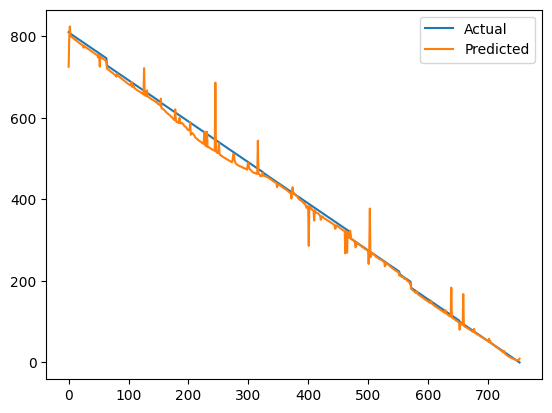

In [ ]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Dense, GRU
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate and display regression metrics
def regression_metrics(y_true, y_pred):
    # Handle zero values to prevent division by zero
    epsilon = 1e-10  # Small constant to avoid divide by zero errors
    y_true_safe = np.where(y_true == 0, epsilon, y_true)  # Replace 0 with epsilon

    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    rmspe = np.sqrt(np.mean(((y_true - y_pred) / y_true_safe) ** 2)) * 100
    mae = np.mean(np.abs(y_true - y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true_safe)) * 100

    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Square Error: {rmse}")
    print(f"Root Mean Square Percentage Error: {rmspe}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Absolute Percentage Error: {mape}")

# ... (Code for loading data and other preprocessing steps) ...

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training, validation, and test data
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

# Define a TCN block with dilations
def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):
    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)
    conv1 = Activation("elu")(conv1)  # Use ELU activation
    return conv1

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))
l2_strength = 0.001

# TCN blocks with different dilation rates
tcn_blocks = []
for dilation_rate in [1, 2, 4]:
    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)
    tcn_blocks.append(tcn_block)

# Merge TCN blocks
merged = Add()(tcn_blocks)

# GRU layer with ELU activation, regularization, and dropout
gru_layer = GRU(32, return_sequences=False,
                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(merged)
gru_layer = Activation("elu")(gru_layer)  # Use ELU activation

# Dense layers with ELU activation
dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)
dense1 = Activation("elu")(dense1)  # Use ELU activation

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Activation("elu")(dense2)  # Use ELU activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model1 = Model(inputs=input_layer, outputs=output_layer)
combined_model1.summary()

# Compile the model with early stopping
opt = Adam(learning_rate=0.01)
combined_model1.compile(optimizer=opt, loss='mae', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=15)
lronplat = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3)

# Train the model
history = combined_model1.fit(X_train_norm, y_train, epochs=100, verbose=1,
                              batch_size=64,
                              validation_data=(X_val_norm, y_val),
                              callbacks=[early_stopping, lronplat])

# Evaluate the model on the test set
y_pred_combined = combined_model1.predict(X_test_norm).flatten()

# Calculate and display regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()


# Model 1 with Selu

In [ ]:
import tensorflow as tf

def selu(x):
    alpha = 1.67326
    scale = 1.0507
    return scale * tf.where(x > 0, x, alpha * (tf.exp(x) - 1))


In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(10,))
dense_layer = Dense(64, activation=selu)(input_layer)
model = Model(inputs=input_layer, outputs=dense_layer)


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_34 (Conv1D)  │ (None, 8, 32)     │        128 │ input_layer_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_35 (Conv1D)  │ (None, 8, 32)     │        128 │ input_layer_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_36 (Conv1D)  │ (None, 8, 32)     │        128 │ input_layer_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_27       │ (None, 8, 32)     │          0 │ conv1d_34[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_28       │ (None, 8, 32)     │          0 │ conv1d_35[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_29       │ (None, 8, 32)     │          0 │ conv1d_36[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 8, 32)     │          0 │ activation_27[0]… │
│                     │                   │            │ activation_28[0]… │
│                     │                   │            │ activation_29[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_14 (GRU)        │ (None, 32)        │      6,336 │ add_11[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_30       │ (None, 32)        │          0 │ gru_14[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 16)        │        528 │ activation_30[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_31       │ (None, 16)        │          0 │ dense_38[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 8)         │        136 │ activation_31[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_32       │ (None, 8)         │          0 │ dense_39[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 1)         │          9 │ activation_32[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,393 (28.88 KB)

 Trainable params: 7,393 (28.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 374.2512 - mae: 373.9907 - val_loss: 29.1808 - val_mae: 28.5440 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 26.1926 - mae: 25.5256 - val_loss: 16.2842 - val_mae: 15.5434 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 17.6324 - mae: 16.8749 - val_loss: 16.5499 - val_mae: 15.7473 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14.7797 - mae: 13.9660 - val_loss: 24.8819 - val_mae: 24.0293 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13.2609 - mae: 12.4060 - val_loss: 19.3552 - val_mae: 18.4930 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.9068 - mae: 8.0450 - val_loss: 15.3710 - val_mae: 14.5102 - learning_rate: 1.0000e-03
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.5647 - mae: 7.7047 - val_loss: 16.4232 - val_mae: 

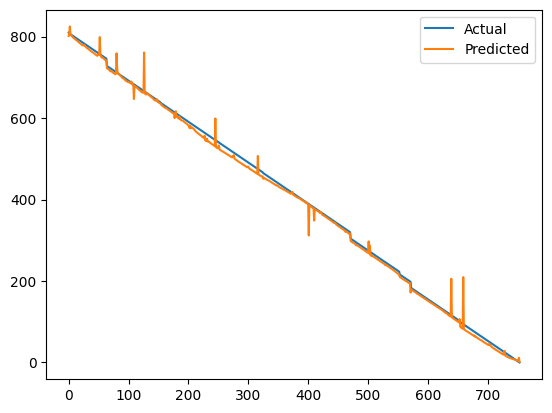

In [ ]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# ... (Code for loading data and other preprocessing steps) ...

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training, validation, and test data
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

# Define a TCN block with dilations
def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):
    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)
    conv1 = Activation("selu")(conv1)  # Replace Trh() with SELU activation
    return conv1

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))
l2_strength = 0.001

# TCN blocks with different dilation rates
tcn_blocks = []
for dilation_rate in [1, 2, 4]:
    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)
    tcn_blocks.append(tcn_block)

# Merge TCN blocks
merged = Add()(tcn_blocks)

# GRU layer with SELU activation, regularization, and dropout
gru_layer = GRU(32, return_sequences=False,
                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(merged)
gru_layer = Activation("selu")(gru_layer)  # Replace Trh() with SELU activation

# Dense layers with SELU activation
dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)
dense1 = Activation("selu")(dense1)  # Replace Trh() with SELU activation

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Activation("selu")(dense2)  # Replace Trh() with SELU activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model1 = Model(inputs=input_layer, outputs=output_layer)
combined_model1.summary()

# Compile the model with early stopping
opt = Adam(learning_rate=0.01)
combined_model1.compile(optimizer=opt, loss='mae', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=15)
lronplat = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3)

# Train the model
history = combined_model1.fit(X_train_norm, y_train, epochs=100, verbose=1,
                              batch_size=64,
                              validation_data=(X_val_norm, y_val),
                              callbacks=[early_stopping, lronplat])

# Evaluate the model on the test set
y_pred_combined = combined_model1.predict(X_test_norm)

# Function to calculate and display regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()


# Model 1 with tanh

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 8, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_12             │ (None, 8, 32)          │              0 │ conv1d_6[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_13             │ (None, 8, 32)          │              0 │ conv1d_7[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_14             │ (None, 8, 32)          │              0 │ conv1d_8[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 8, 32)          │              0 │ activation_12[0][0],   │
│                           │                        │                │ activation_13[0][0],   │
│                           │                        │                │ activation_14[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_2 (GRU)               │ (None, 32)             │          6,336 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_15             │ (None, 32)             │              0 │ gru_2[0][0]            │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 16)             │            528 │ activation_15[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_16             │ (None, 16)             │              0 │ dense_6[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 8)              │            136 │ activation_16[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_17             │ (None, 8)              │              0 │ dense_7[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │              9 │ activation_17[0][0]    │
└──────────────────────

 Total params: 7,393 (28.88 KB)

 Trainable params: 7,393 (28.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 383.7946 - mae: 383.5216 - val_loss: 15.0012 - val_mae: 14.3039 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 16.4170 - mae: 15.7104 - val_loss: 19.5747 - val_mae: 18.8513 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 11.8926 - mae: 11.1625 - val_loss: 13.9715 - val_mae: 13.2340 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9.4202 - mae: 8.6804 - val_loss: 15.2055 - val_mae: 14.4567 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.2200 - mae: 8.4724 - val_loss: 25.1162 - val_mae: 24.3636 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 10.8627 - mae: 10.1074 - val_loss: 11.6369 - val_mae: 10.8826 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 7.8399 - mae: 7.0846 - val_loss: 9.3245 - val_mae: 8.57

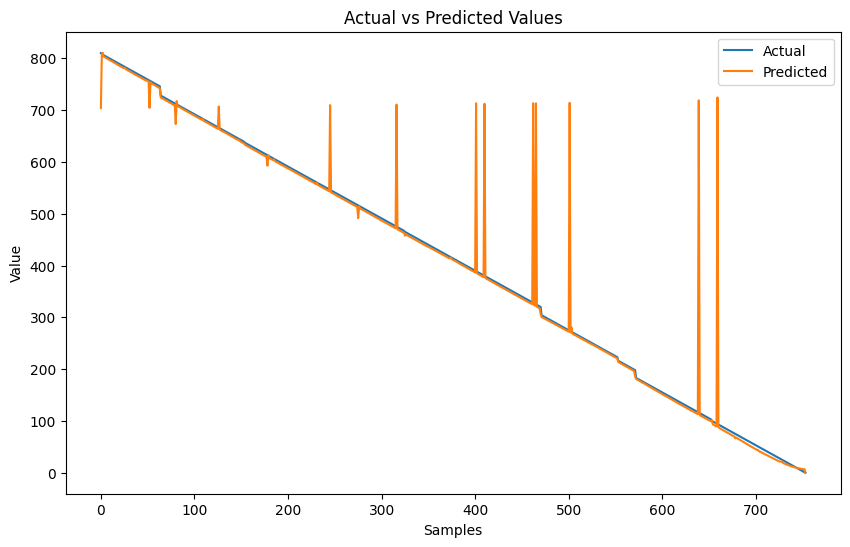

In [ ]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Dropout, Dense, GRU
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate and display regression metrics
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")

# Assume `X_train`, `X_val`, `X_test`, `y_train`, `y_val`, `y_test` are preloaded

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training, validation, and test data
X_train_norm = scaler.fit_transform(X_train).reshape(-1, X_train.shape[1], 1)
X_val_norm = scaler.transform(X_val).reshape(-1, X_val.shape[1], 1)
X_test_norm = scaler.transform(X_test).reshape(-1, X_test.shape[1], 1)

# Define a TCN block with dilations
def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):
    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)
    conv1 = Activation("elu")(conv1)  # Apply ELU activation
    return conv1

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))
l2_strength = 0.001

# TCN blocks with different dilation rates
tcn_blocks = []
for dilation_rate in [1, 2, 4]:
    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)
    tcn_blocks.append(tcn_block)

# Merge TCN blocks
merged = Add()(tcn_blocks)

# GRU layer with ELU activation, regularization, and dropout
gru_layer = GRU(32, return_sequences=False,
                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(merged)
gru_layer = Activation("elu")(gru_layer)  # Apply ELU activation

# Dense layers with ELU activation
dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)
dense1 = Activation("elu")(dense1)  # Apply ELU activation

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Activation("elu")(dense2)  # Apply ELU activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine the models
combined_model1 = Model(inputs=input_layer, outputs=output_layer)
combined_model1.summary()

# Compile the model with early stopping and learning rate reduction
opt = Adam(learning_rate=0.01)
combined_model1.compile(optimizer=opt, loss='mae', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lronplat = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

# Train the model
history = combined_model1.fit(X_train_norm, y_train, epochs=100, verbose=1,
                              batch_size=64,
                              validation_data=(X_val_norm, y_val),
                              callbacks=[early_stopping, lronplat])

# Evaluate the model on the test set
y_pred_combined = combined_model1.predict(X_test_norm)

# Display regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Values")
plt.xlabel("Samples")
plt.ylabel("Value")
plt.show()


# Model 2 with relu

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 557.3417 - mae: 557.0970 - val_loss: 617.0924 - val_mae: 616.8818 - learning_rate: 5.0000e-04
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 548.3625 - mae: 548.1612 - val_loss: 612.2270 - val_mae: 612.0491 - learning_rate: 5.0000e-04
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 547.0326 - mae: 546.8602 - val_loss: 608.1193 - val_mae: 607.9612 - learning_rate: 5.0000e-04
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 546.5811 - mae: 546.4249 - val_loss: 607.3898 - val_mae: 607.2430 - learning_rate: 5.0000e-04
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 547.3041 - mae: 547.1594 - val_loss: 605.7408 - val_mae: 605.6013 - learning_rate: 5.0000e-04
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 539.5264 - mae: 539.3881 - val_loss: 597.8832 - val_mae: 597.7493 - learning_rate: 5.0000e-04
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 5

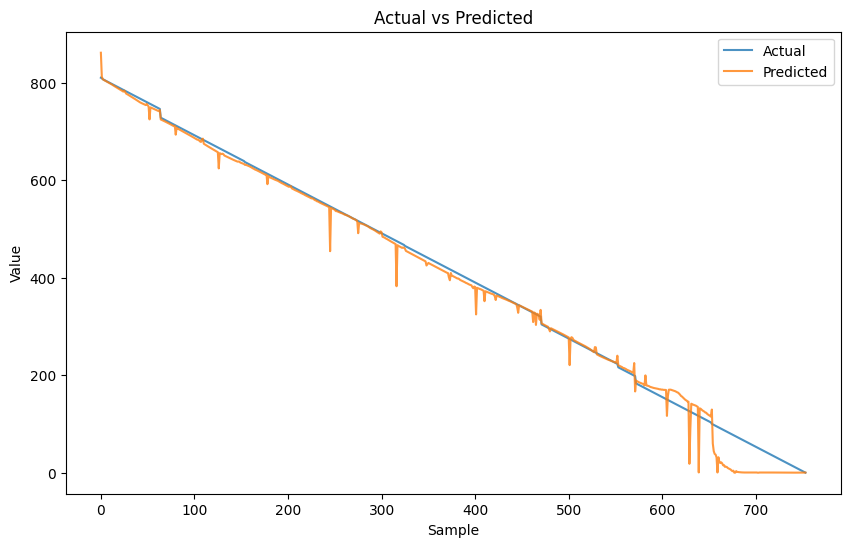

In [ ]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Custom activation function for more flexibility
def custom_activation(x):
    return tf.where(x >= 0, x, tf.tanh(x) + tf.atan(x))

# Regression metrics
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    return mse, rmse, mae

# Placeholder for loading data
# Replace with actual data loading logic
# X_train, y_train, X_val, y_val, X_test, y_test = ...

# Data normalization
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train).reshape(-1, X_train.shape[1], 1)
X_val_norm = scaler.transform(X_val).reshape(-1, X_val.shape[1], 1)
X_test_norm = scaler.transform(X_test).reshape(-1, X_test.shape[1], 1)

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))
l2_strength = 0.001

# Stacked GRU layers
gru1 = GRU(64, activation='tanh', return_sequences=True, kernel_regularizer=l2(l2_strength))(input_layer)
gru1 = BatchNormalization()(gru1)
gru1 = Dropout(0.3)(gru1)

gru2 = GRU(64, activation='tanh', return_sequences=True, kernel_regularizer=l2(l2_strength))(gru1)
gru2 = BatchNormalization()(gru2)
gru2 = Dropout(0.3)(gru2)

gru3 = GRU(64, activation='tanh', return_sequences=False, kernel_regularizer=l2(l2_strength))(gru2)
gru3 = BatchNormalization()(gru3)
gru3 = Lambda(custom_activation)(gru3)

# Fully connected layers
dense1 = Dense(32, activation=None, kernel_regularizer=l2(l2_strength))(gru3)
dense1 = BatchNormalization()(dense1)
dense1 = Lambda(custom_activation)(dense1)
dense1 = Dropout(0.3)(dense1)

dense2 = Dense(16, activation=None, kernel_regularizer=l2(l2_strength))(dense1)
dense2 = BatchNormalization()(dense2)
dense2 = Lambda(custom_activation)(dense2)

# Output layer
output_layer = Dense(1, activation='linear')(dense2)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
opt = Adam(learning_rate=5e-4)
model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

# Train the model
history = model.fit(
    X_train_norm, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate on test set
y_pred = model.predict(X_test_norm).flatten()
mse, rmse, mae = regression_metrics(y_test, y_pred)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', alpha=0.8)
plt.plot(y_pred, label='Predicted', alpha=0.8)
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()


# model 2 with own function

In [ ]:
def custom_activation(x):
    return tf.where(x >= 0, tf.tanh(x), tf.atan(x))

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 8, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_15 (Conv1D)        │ (None, 8, 32)          │            128 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_16 (Conv1D)        │ (None, 8, 32)          │            128 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_17 (Conv1D)        │ (None, 8, 32)          │            128 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_6 (Lambda)         │ (None, 8, 32)          │              0 │ conv1d_15[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_7 (Lambda)         │ (None, 8, 32)          │              0 │ conv1d_16[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_8 (Lambda)         │ (None, 8, 32)          │              0 │ conv1d_17[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 8, 32)          │              0 │ lambda_6[0][0],        │
│                           │                        │                │ lambda_7[0][0],        │
│                           │                        │                │ lambda_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_5 (GRU)               │ (None, 64)             │         18,816 │ add_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_9 (Lambda)         │ (None, 64)             │              0 │ gru_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 32)             │          2,080 │ lambda_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_10 (Lambda)        │ (None, 32)             │              0 │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 16)             │            528 │ lambda_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_11 (Lambda)        │ (None, 16)             │              0 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 1)              │             17 │ lambda_11[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 21,825 (85.25 KB)

 Trainable params: 21,825 (85.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - loss: 540.5368 - mae: 540.3436 - val_loss: 571.2589 - val_mae: 570.9471 - learning_rate: 0.0100
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 497.0298 - mae: 496.6317 - val_loss: 536.1833 - val_mae: 535.5063 - learning_rate: 0.0100
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - loss: 463.4680 - mae: 462.6913 - val_loss: 505.6083 - val_mae: 504.5096 - learning_rate: 0.0100
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 431.9228 - mae: 430.7098 - val_loss: 478.8449 - val_mae: 477.2772 - learning_rate: 0.0100
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 403.1649 - mae: 401.4702 - val_loss: 455.2617 - val_mae: 453.0914 - learning_rate: 0.0100
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 378.8455 - mae: 376.5846 - val_loss: 434.0173 - val_mae: 431.3536 - learning_rate: 0.0100
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 362.7246 - mae: 359.9188 - val_

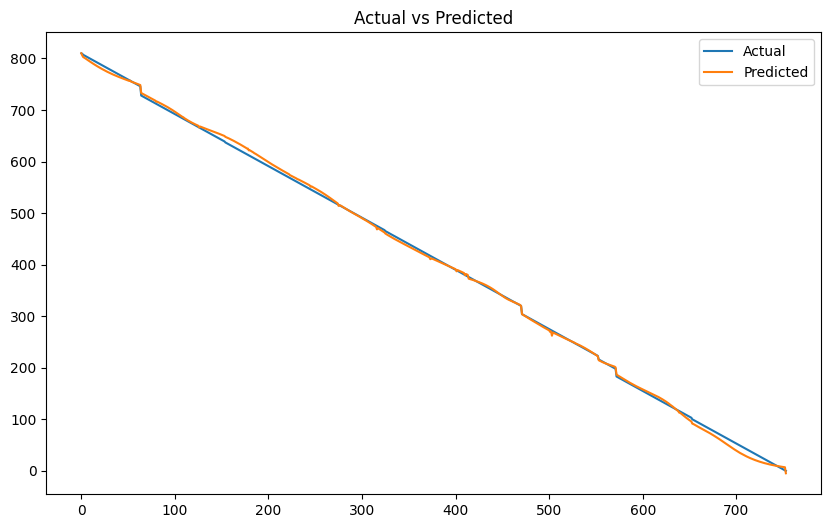

In [ ]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Add, GRU, Dense, Activation, Lambda
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define your custom activation function
def custom_activation(x):
    return tf.where(x >= 0, tf.tanh(x), tf.atan(x))

# ... (Code for loading and preprocessing data) ...

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training, validation, and test data
X_train_norm = scaler.fit_transform(X_train).reshape(-1, X_train.shape[1], 1)
X_val_norm = scaler.transform(X_val).reshape(-1, X_val.shape[1], 1)
X_test_norm = scaler.transform(X_test).reshape(-1, X_test.shape[1], 1)

# Define a TCN block with custom activation
def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):
    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)
    conv1 = Lambda(custom_activation)(conv1)  # Apply custom activation function
    return conv1

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))
l2_strength = 0.001

# TCN blocks
tcn_blocks = []
for dilation_rate in [1, 2, 4]:
    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)
    tcn_blocks.append(tcn_block)

# Merge TCN blocks
merged = Add()(tcn_blocks)

# GRU layer with custom activation
gru_layer = GRU(
    64,
    activation=None,  # No activation (we will use custom activation after the layer)
    return_sequences=False,
    kernel_regularizer=l2(l2_strength),
    recurrent_regularizer=l2(l2_strength),
    bias_regularizer=l2(l2_strength)
)(merged)
gru_layer = Lambda(custom_activation)(gru_layer)  # Apply custom activation

# Dense layers with custom activation
dense1 = Dense(32, activation=None, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)
dense1 = Lambda(custom_activation)(dense1)  # Apply custom activation

dense2 = Dense(16, activation=None, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Lambda(custom_activation)(dense2)  # Apply custom activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine into a model
combined_model6 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with early stopping
opt = Adam(learning_rate=0.01)
combined_model6.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Print the model summary
combined_model6.summary()

# Train the model
history = combined_model6.fit(
    X_train_norm, y_train,
    epochs=50,
    verbose=1,
    batch_size=64,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
y_pred_combined = combined_model6.predict(X_test_norm)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_combined)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_combined)

# Print metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()


# model 2 with own function 2

In [ ]:
def custom_act(x):
    return tf.where(x>=0, x, tf.tanh(x)+tf.atan(x))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8, 1)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 8, 32)          │            128 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 8, 32)          │              0 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 8, 32)          │              0 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, 8, 32)          │              0 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 8, 32)          │              0 │ lambda[0][0],          │
│                           │                        │                │ lambda_1[0][0],        │
│                           │                        │                │ lambda_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 64)             │         18,816 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_3 (Lambda)         │ (None, 64)             │              0 │ gru[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32)             │          2,080 │ lambda_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_4 (Lambda)         │ (None, 32)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 16)             │            528 │ lambda_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_5 (Lambda)         │ (None, 16)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             17 │ lambda_5[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 21,825 (85.25 KB)

 Trainable params: 21,825 (85.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 239.2496 - mae: 238.9565 - val_loss: 34.4254 - val_mae: 33.9384 - learning_rate: 0.0100
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 25.4054 - mae: 24.8789 - val_loss: 17.0319 - val_mae: 16.4092 - learning_rate: 0.0100
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 19.0801 - mae: 18.4261 - val_loss: 14.7933 - val_mae: 14.0712 - learning_rate: 0.0100
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 15.6912 - mae: 14.9616 - val_loss: 17.5819 - val_mae: 16.8216 - learning_rate: 0.0100
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 13.8681 - mae: 13.1028 - val_loss: 12.8344 - val_mae: 12.0502 - learning_rate: 0.0100
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 12.3512 - mae: 11.5654 - val_loss: 13.3195 - val_mae: 12.5194 - learning_rate: 0.0100
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 13.8787 - mae: 13.0753 - val_loss: 9.9873 - val_mae: 9.

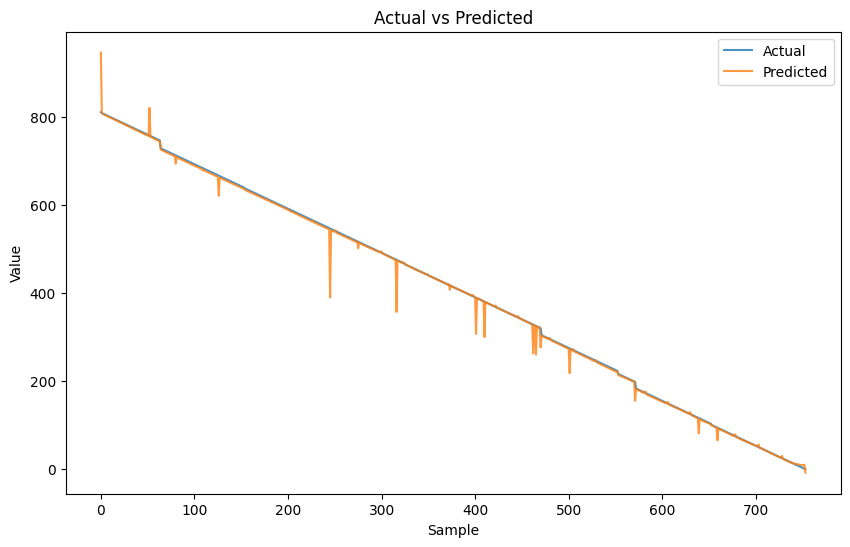

In [ ]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Add, GRU, Dense, Activation, Lambda
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the custom activation function
def custom_activation(x):
    return tf.where(x >= 0, x, tf.tanh(x) + tf.atan(x))

# Placeholder for loading data
# Replace with your data loading logic
# Example:
# X_train, y_train = ...
# X_val, y_val = ...
# X_test, y_test = ...

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train).reshape(-1, X_train.shape[1], 1)
X_val_norm = scaler.transform(X_val).reshape(-1, X_val.shape[1], 1)
X_test_norm = scaler.transform(X_test).reshape(-1, X_test.shape[1], 1)

# Define a TCN block with the custom activation function
def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):
    conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                  padding='causal', dilation_rate=dilation_rate)(input_layer)
    conv = Lambda(custom_activation)(conv)  # Apply custom activation function
    return conv

# Build the TCN + GRU Model
input_layer = Input(shape=(X_train_norm.shape[1], 1))
l2_strength = 0.001

# TCN blocks with increasing dilation rates
tcn_blocks = []
for dilation_rate in [1, 2, 4]:
    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)
    tcn_blocks.append(tcn_block)

# Merge outputs of TCN blocks
merged = Add()(tcn_blocks)

# GRU layer
gru_layer = GRU(
    64, activation=None, return_sequences=False,
    kernel_regularizer=l2(l2_strength),
    recurrent_regularizer=l2(l2_strength),
    bias_regularizer=l2(l2_strength)
)(merged)
gru_layer = Lambda(custom_activation)(gru_layer)

# Fully connected (Dense) layers with custom activation
dense1 = Dense(32, activation=None, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)
dense1 = Lambda(custom_activation)(dense1)

dense2 = Dense(16, activation=None, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Lambda(custom_activation)(dense2)

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Compile the model
combined_model6 = Model(inputs=input_layer, outputs=output_layer)
opt = Adam(learning_rate=0.01)
combined_model6.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Model summary
combined_model6.summary()

# Callbacks: Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = combined_model6.fit(
    X_train_norm, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate on test set
y_pred_combined = combined_model6.predict(X_test_norm).flatten()

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_combined)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_combined)

# Print metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', alpha=0.8)
plt.plot(y_pred_combined, label='Predicted', alpha=0.8)
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()


# model 2 with elu


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 8, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_39 (Conv1D)        │ (None, 8, 64)          │            256 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_40 (Conv1D)        │ (None, 8, 64)          │            256 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_41 (Conv1D)        │ (None, 8, 64)          │            256 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_44             │ (None, 8, 64)          │              0 │ conv1d_39[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_45             │ (None, 8, 64)          │              0 │ conv1d_40[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_46             │ (None, 8, 64)          │              0 │ conv1d_41[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_53 (Dropout)      │ (None, 8, 64)          │              0 │ activation_44[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_54 (Dropout)      │ (None, 8, 64)          │              0 │ activation_45[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_55 (Dropout)      │ (None, 8, 64)          │              0 │ activation_46[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_14 (Add)              │ (None, 8, 64)          │              0 │ dropout_53[0][0],      │
│                           │                        │                │ dropout_54[0][0],      │
│                           │                        │                │ dropout_55[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_23    │ (None, 8, 64)          │            256 │ add_14[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_14 (GRU)              │ (None, 128)            │         74,496 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_47             │ (None, 128)            │              0 │ gru_14[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_36 (Dense)          │ (None, 64)             │          8,256 │ activation_47[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2

 Total params: 86,273 (337.00 KB)

 Trainable params: 85,953 (335.75 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - loss: 556.1467 - mae: 555.7885 - val_loss: 617.0839 - val_mae: 616.7490 - learning_rate: 5.0000e-04
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 553.0682 - mae: 552.7401 - val_loss: 615.0341 - val_mae: 614.7249 - learning_rate: 5.0000e-04
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 551.1526 - mae: 550.8484 - val_loss: 611.4009 - val_mae: 611.1102 - learning_rate: 5.0000e-04
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 549.3974 - mae: 549.1091 - val_loss: 604.6260 - val_mae: 604.3428 - learning_rate: 5.0000e-04
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 538.6118 - mae: 538.3282 - val_loss: 601.4781 - val_mae: 601.1930 - learning_rate: 5.0000e-04
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 537.1549 - mae: 536.8693 - val_loss: 591.3754 - val_mae: 591.0866 - learning_rate: 5.0000e-04
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 

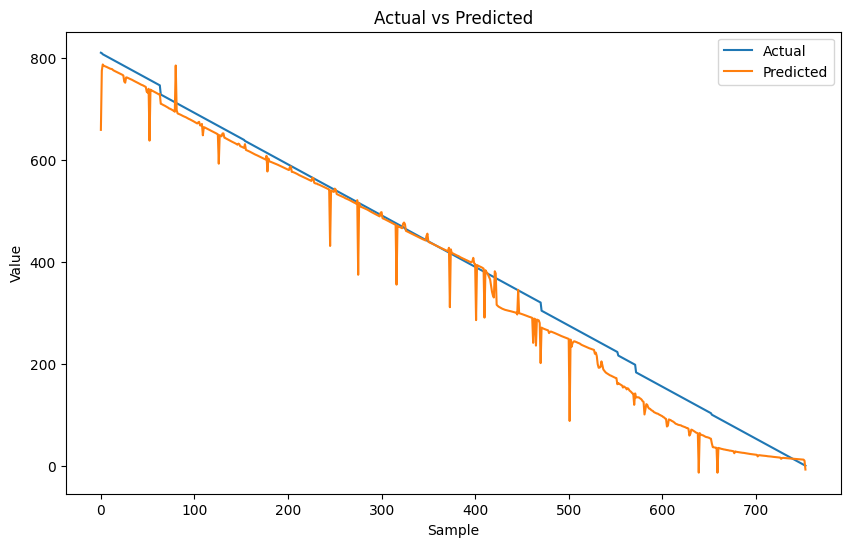

In [ ]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Add, GRU, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assume `X_train`, `X_val`, `X_test`, `y_train`, `y_val`, `y_test` are preloaded

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training, validation, and test data
X_train_norm = scaler.fit_transform(X_train).reshape(-1, X_train.shape[1], 1)
X_val_norm = scaler.transform(X_val).reshape(-1, X_val.shape[1], 1)
X_test_norm = scaler.transform(X_test).reshape(-1, X_test.shape[1], 1)

# Define a TCN block with ELU activation
def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):
    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)
    conv1 = Activation('elu')(conv1)  # Apply ELU activation
    conv1 = Dropout(0.3)(conv1)  # Dropout regularization
    return conv1

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))
l2_strength = 0.001

# TCN blocks
tcn_blocks = []
for dilation_rate in [1, 2, 4]:
    tcn_block = dilated_tcn_block(input_layer, nb_filters=64, kernel_size=3, dilation_rate=dilation_rate)
    tcn_blocks.append(tcn_block)

# Merge TCN blocks
merged = Add()(tcn_blocks)
merged = BatchNormalization()(merged)  # Batch normalization

# GRU layer with ELU activation and more units
gru_layer = GRU(
    128,  # Increased number of GRU units
    activation=None,  # No activation inside GRU (ELU applied after the layer)
    return_sequences=False,
    kernel_regularizer=l2(l2_strength),
    recurrent_regularizer=l2(l2_strength),
    bias_regularizer=l2(l2_strength)
)(merged)
gru_layer = Activation('elu')(gru_layer)  # Apply ELU activation

# Dense layers with ELU activation
dense1 = Dense(64, activation=None, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)
dense1 = BatchNormalization()(dense1)  # Batch normalization
dense1 = Activation('elu')(dense1)  # Apply ELU activation
dense1 = Dropout(0.3)(dense1)  # Dropout regularization

dense2 = Dense(32, activation=None, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = BatchNormalization()(dense2)  # Batch normalization
dense2 = Activation('elu')(dense2)  # Apply ELU activation
dense2 = Dropout(0.3)(dense2)  # Dropout regularization

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine into a model
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with early stopping
opt = Adam(learning_rate=5e-4)  # Reduced learning rate
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

# Print the model summary
combined_model.summary()

# Train the model
history = combined_model.fit(
    X_train_norm, y_train,
    epochs=100,
    verbose=1,
    batch_size=64,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
y_pred_combined = combined_model.predict(X_test_norm)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_combined)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_combined)

# Print metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()


# model 2 with selu

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 8, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 8, 32)          │            128 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_20             │ (None, 8, 32)          │              0 │ conv1d_6[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_21             │ (None, 8, 32)          │              0 │ conv1d_7[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_22             │ (None, 8, 32)          │              0 │ conv1d_8[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 8, 32)          │              0 │ activation_20[0][0],   │
│                           │                        │                │ activation_21[0][0],   │
│                           │                        │                │ activation_22[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_15 (GRU)              │ (None, 64)             │         18,816 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_23             │ (None, 64)             │              0 │ gru_15[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 32)             │          2,080 │ activation_23[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_24             │ (None, 32)             │              0 │ dense_21[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 16)             │            528 │ activation_24[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_25             │ (None, 16)             │              0 │ dense_22[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 1)              │             17 │ activation_25[0][0]    │
└──────────────────────

 Total params: 21,825 (85.25 KB)

 Trainable params: 21,825 (85.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 195.8567 - mae: 195.6201 - val_loss: 112.4967 - val_mae: 112.1829 - learning_rate: 0.0100
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 73.0302 - mae: 72.6749 - val_loss: 61.0555 - val_mae: 60.5657 - learning_rate: 0.0100
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 39.5972 - mae: 39.0696 - val_loss: 60.4266 - val_mae: 59.7936 - learning_rate: 0.0100
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 47.6342 - mae: 46.9549 - val_loss: 69.3897 - val_mae: 68.5992 - learning_rate: 0.0100
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 36.5756 - mae: 35.7188 - val_loss: 23.9521 - val_mae: 22.7510 - learning_rate: 0.0100
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 29.5468 - mae: 28.2113 - val_loss: 15.4731 - val_mae: 13.9509 - learning_rate: 0.0100
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 28.8463 - mae: 27.2592 - val_loss: 16.7621 - val_mae

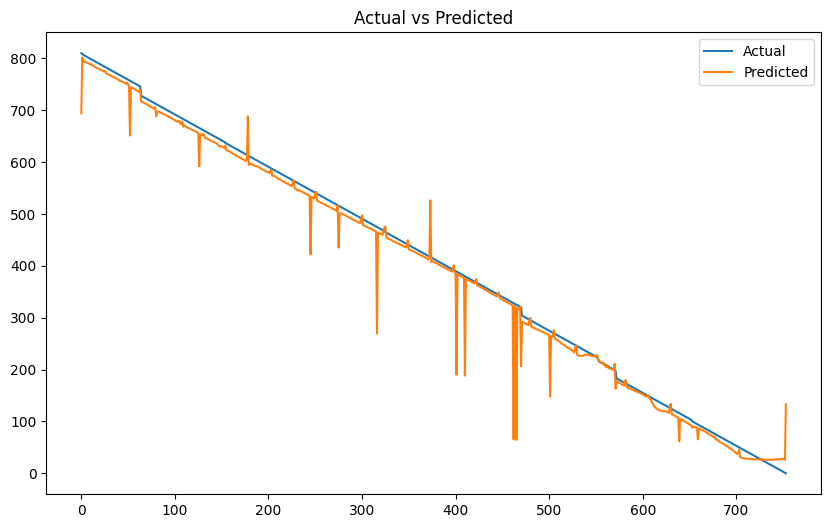

In [ ]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Add, GRU, Dense, Activation, Dropout
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ... (Code for loading and preprocessing data) ...

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training, validation, and test data
X_train_norm = scaler.fit_transform(X_train).reshape(-1, X_train.shape[1], 1)
X_val_norm = scaler.transform(X_val).reshape(-1, X_val.shape[1], 1)
X_test_norm = scaler.transform(X_test).reshape(-1, X_test.shape[1], 1)

# Define a TCN block with SELU activation
def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):
    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)
    conv1 = Activation('selu')(conv1)  # Apply SELU activation
    return conv1

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))
l2_strength = 0.001

# TCN blocks
tcn_blocks = []
for dilation_rate in [1, 2, 4]:
    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)
    tcn_blocks.append(tcn_block)

# Merge TCN blocks
merged = Add()(tcn_blocks)

# GRU layer with SELU activation
gru_layer = GRU(
    64,
    activation=None,  # No activation inside GRU (SELU applied after the layer)
    return_sequences=False,
    kernel_regularizer=l2(l2_strength),
    recurrent_regularizer=l2(l2_strength),
    bias_regularizer=l2(l2_strength)
)(merged)
gru_layer = Activation('selu')(gru_layer)  # Apply SELU activation

# Dense layers with SELU activation
dense1 = Dense(32, activation=None, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)
dense1 = Activation('selu')(dense1)  # Apply SELU activation

dense2 = Dense(16, activation=None, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Activation('selu')(dense2)  # Apply SELU activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine into a model
combined_model6 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with early stopping
opt = Adam(learning_rate=0.01)
combined_model6.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Print the model summary
combined_model6.summary()

# Train the model
history = combined_model6.fit(
    X_train_norm, y_train,
    epochs=50,
    verbose=1,
    batch_size=64,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
y_pred_combined = combined_model6.predict(X_test_norm)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_combined)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_combined)

# Print metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()


## Model 2 with tanh

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 8, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 8, 32)          │            128 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 8, 32)          │            128 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_14 (Conv1D)        │ (None, 8, 32)          │            128 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_29             │ (None, 8, 32)          │              0 │ conv1d_12[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_30             │ (None, 8, 32)          │              0 │ conv1d_13[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_31             │ (None, 8, 32)          │              0 │ conv1d_14[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 8, 32)          │              0 │ activation_29[0][0],   │
│                           │                        │                │ activation_30[0][0],   │
│                           │                        │                │ activation_31[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_20 (GRU)              │ (None, 64)             │         18,816 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_32             │ (None, 64)             │              0 │ gru_20[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 32)             │          2,080 │ activation_32[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_33             │ (None, 32)             │              0 │ dense_30[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_31 (Dense)          │ (None, 16)             │            528 │ activation_33[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_34             │ (None, 16)             │              0 │ dense_31[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)          │ (None, 1)              │             17 │ activation_34[0][0]    │
└──────────────────────

 Total params: 21,825 (85.25 KB)

 Trainable params: 21,825 (85.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 541.2990 - mae: 541.1299 - val_loss: 582.1456 - val_mae: 581.9557 - learning_rate: 0.0100
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 511.4029 - mae: 511.1862 - val_loss: 554.4285 - val_mae: 554.0739 - learning_rate: 0.0100
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 482.9626 - mae: 482.5371 - val_loss: 529.6323 - val_mae: 528.9619 - learning_rate: 0.0100
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 454.9763 - mae: 454.2072 - val_loss: 507.1837 - val_mae: 506.0894 - learning_rate: 0.0100
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 433.2388 - mae: 432.0215 - val_loss: 486.9257 - val_mae: 485.3165 - learning_rate: 0.0100
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 414.4675 - mae: 412.7149 - val_loss: 468.6174 - val_mae: 466.4151 - learning_rate: 0.0100
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 394.0445 - mae: 391.6853 - val_lo

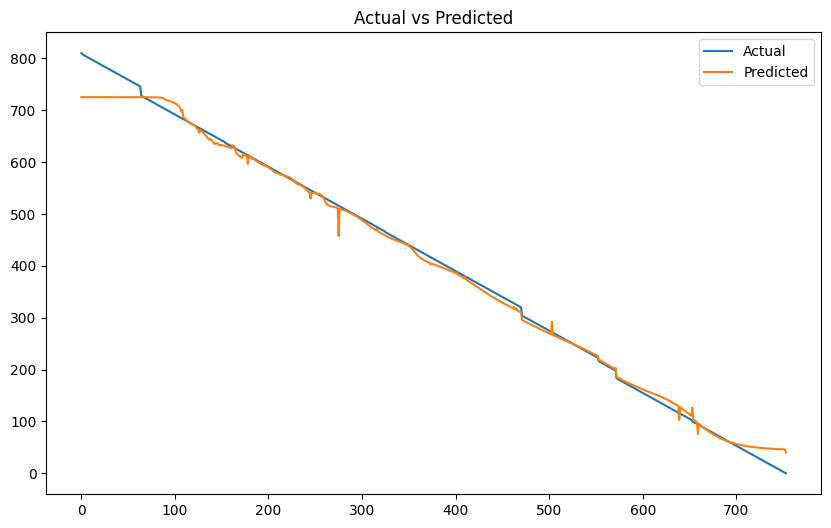

In [ ]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Input, Add, GRU, Dense, Activation, Dropout
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ... (Code for loading and preprocessing data) ...

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training, validation, and test data
X_train_norm = scaler.fit_transform(X_train).reshape(-1, X_train.shape[1], 1)
X_val_norm = scaler.transform(X_val).reshape(-1, X_val.shape[1], 1)
X_test_norm = scaler.transform(X_test).reshape(-1, X_test.shape[1], 1)

# Define a TCN block with tanh activation
def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):
    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)
    conv1 = Activation('tanh')(conv1)  # Apply tanh activation
    return conv1

# Model definition
input_layer = Input(shape=(X_train_norm.shape[1], 1))
l2_strength = 0.001

# TCN blocks
tcn_blocks = []
for dilation_rate in [1, 2, 4]:
    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)
    tcn_blocks.append(tcn_block)

# Merge TCN blocks
merged = Add()(tcn_blocks)

# GRU layer with tanh activation
gru_layer = GRU(
    64,
    activation=None,  # No activation inside GRU (tanh applied after the layer)
    return_sequences=False,
    kernel_regularizer=l2(l2_strength),
    recurrent_regularizer=l2(l2_strength),
    bias_regularizer=l2(l2_strength)
)(merged)
gru_layer = Activation('tanh')(gru_layer)  # Apply tanh activation

# Dense layers with tanh activation
dense1 = Dense(32, activation=None, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)
dense1 = Activation('tanh')(dense1)  # Apply tanh activation

dense2 = Dense(16, activation=None, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Activation('tanh')(dense2)  # Apply tanh activation

# Output layer
output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)

# Combine into a model
combined_model6 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with early stopping
opt = Adam(learning_rate=0.01)
combined_model6.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Print the model summary
combined_model6.summary()

# Train the model
history = combined_model6.fit(
    X_train_norm, y_train,
    epochs=50,
    verbose=1,
    batch_size=64,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
y_pred_combined = combined_model6.predict(X_test_norm)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_combined)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_combined)

# Print metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()


# Model 6

In [ ]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Define a TCN block with dilations

def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):

    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)

    conv1 = Activation('relu')(conv1)

    return conv1



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# TCN block

tcn_blocks = []

for dilation_rate in [1, 2, 4]:

    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)

    tcn_blocks.append(tcn_block)



# Merge TCN blocks

merged = Add()(tcn_blocks)



# GRU layer with regularization and dropout

gru_layer = GRU(64, activation='relu', return_sequences=False,

                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(merged)



# Dense layers

dense1 = Dense(32, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)

dense2 = Dense(16, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model6 = Model(inputs=input_layer, outputs=output_layer)



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model6.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)

combined_model6.summary()

# Train the model

history = combined_model6.fit(X_train_norm, y_train, epochs=50, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model6.predict(X_test_norm)



regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 6 with Trh

In [ ]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Define a TCN block with dilations

def dilated_tcn_block(input_layer, nb_filters, kernel_size, dilation_rate):

    conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate)(input_layer)

    conv1 = Trh()(conv1)

    return conv1



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# TCN block

tcn_blocks = []

for dilation_rate in [1, 2, 4]:

    tcn_block = dilated_tcn_block(input_layer, nb_filters=32, kernel_size=3, dilation_rate=dilation_rate)

    tcn_blocks.append(tcn_block)



# Merge TCN blocks

merged = Add()(tcn_blocks)



# GRU layer with regularization and dropout

gru_layer = GRU(64, return_sequences=False,

                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(merged)

gru_layer = Trh()(gru_layer)

# Dense layers

dense1 = Dense(32, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(gru_layer)
dense1 = Trh()(dense1)

dense2 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Trh()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model6 = Model(inputs=input_layer, outputs=output_layer)



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model6.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)

combined_model6.summary()

# Train the model

history = combined_model6.fit(X_train_norm, y_train, epochs=50, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model6.predict(X_test_norm)



regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Observation:

* The average of losses of all the models for different functions is less for "Tar" function.
* The minimum of losses is for "Trh" function.

In [ ]:

y_pred_combined = combined_model3.predict([X_test_norm])
regression_metrics(y_test, y_pred_combined)
plot_comparison(y_test=y_test, y_pred=y_pred_combined, xlabel="Cycle Index", ylabel="RUL", dark_mode=False)